In [313]:
#!/usr/bin/env python

#import pyfits, os, re, glob, sys
import  os, re, glob, sys
from scipy.optimize import leastsq
from numpy import *
from pylab import *
from scipy import *
from scipy import optimize
import numpy as N
import pylab as P

import numpy as np
from scipy.optimize import curve_fit

𝑦=𝑀(1−𝑒**−𝑎𝑥)

In [314]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy.special import expit
from numpy import math
import pandas as pd

As a quick and dirty alternative to the perhaps more principled approach, here is something you could try. Ultimately, it could be merged with an direct estimation approach.
If you assume your responses are governed by two exponential processes characterizing the rise and decay of your calcium signal,
you could see a solution of this form:

2:20
y = K1*(1-e^(t/tau1)) - K2*(1-e(t/tau2))
If you plot this out, you'll see that the first term gives you a simple asymptotic rise to a plateau at K1 (according to time constant tau1), and the second term can account for a slow decay according to tau2.
2:22
Here is some simple characteristics of model:
If your muscle rises to a steady plateau, K2 is likely to be zero, the exception being if the rise time is not well fir by a single exponential, in which case you might have a situation where K1>K2.
If your muscle rises and then decays back to zero and steady state, then K1=K2.

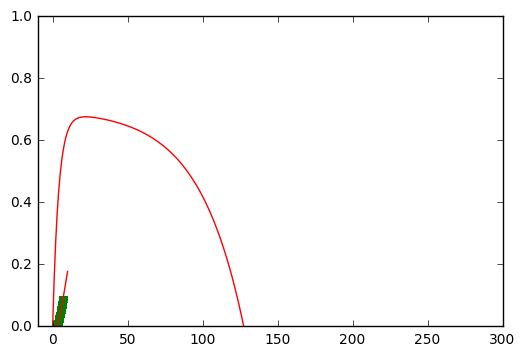

In [315]:
#y = K1*(1-e^(t/tau1)) - K2*(1-e(t/tau2))

plt.figure(1, figsize=(4, 3))
t = np.arange(0,300)
K1 = 0.7
K2 = 0.01
tau1 = 4.
tau2 = 30.
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
y = K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2)) ##wrong
plt.plot(t, y)

plt.xlim(-10., 300.)
plt.ylim(0., 1.0)

plt.show()

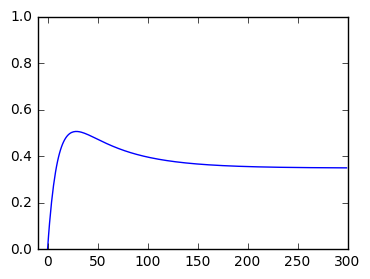

In [316]:
#y = K1*(1-e^(t/tau1)) - K2*(1-e(t/tau2))

plt.figure(1, figsize=(4, 3))
t = np.arange(0,300)
K1 = 0.7
K2 = 0.35
tau1 = 10.
tau2 = 50.
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
y = K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
plt.plot(t, y)

plt.xlim(-10., 300.)
plt.ylim(0., 1.0)

plt.show()

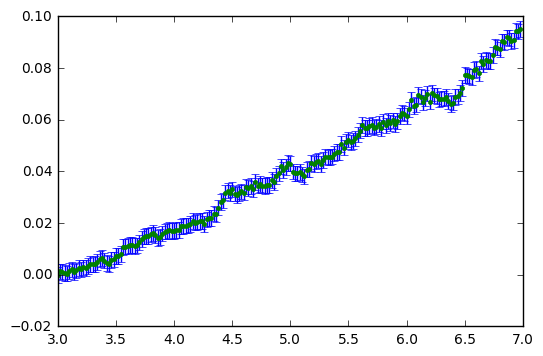

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

In [318]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['hg3_l'][150:350]-(yaw_left_df['hg3_l'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(0.00, 0.4)

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in divide


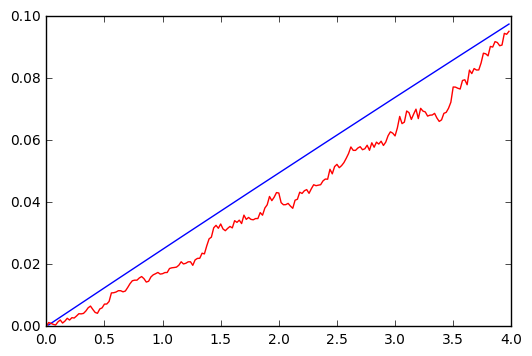

In [320]:

times = np.arange(350)*0.02
t = times[150:350]
x = t - times[150]
y_data =yaw_left_df['hg3_l'][150:350]-(yaw_left_df['hg3_l'][150])
K1 = 2.5
K2 = 0
tau1 = 100
tau2 = 0
y= K1*(1-math.e**(-x/tau1)) - K2*(1-math.e**(-(x)/tau2))

plt.plot(x, y)
plt.plot(x, y_data, 'r')
plt.xlim(0, 4)
plt.ylim(0, 0.1)

plt.show()

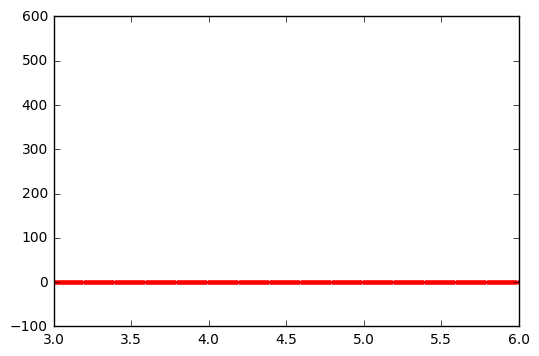

('K1 =', 1549.4172312620942, '+/-', inf)
('k2 =', 1549.6195780566723, '+/-', inf)
('tau_1 =', 0.11500700302183028, '+/-', inf)
('tau_2 =', 0.3433366439304027, '+/-', inf)


(0.0, 0.4)

In [327]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['iii3_l'][150:350]-(yaw_left_df['iii3_l'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(0.00, 0.4)

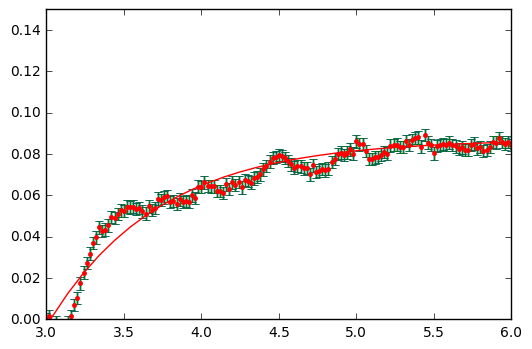

('K1 =', -5.9385583780335605, '+/-', inf)
('k2 =', -6.02567546025284, '+/-', inf)
('tau_1 =', 0.088965151982786789, '+/-', inf)
('tau_2 =', 0.71455194260491861, '+/-', inf)


(0.0, 0.15)

In [329]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['iii3_r'][150:350]-(yaw_left_df['iii3_r'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=10000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(0.00, 0.15)

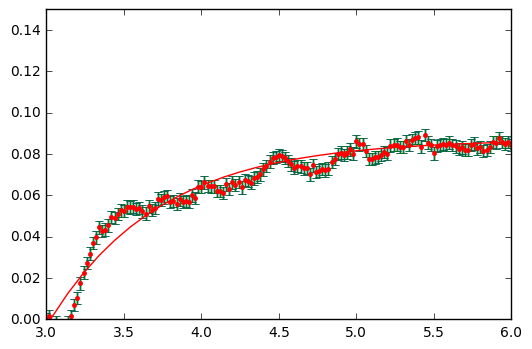

('K1 =', -5.9385583780335605, '+/-', inf)
('k2 =', -6.02567546025284, '+/-', inf)
('tau_1 =', 0.088965151982786789, '+/-', inf)
('tau_2 =', 0.71455194260491861, '+/-', inf)


(0.0, 0.15)

In [331]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['iii3_r'][150:350]-(yaw_left_df['iii3_r'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=10000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(0.00, 0.15)

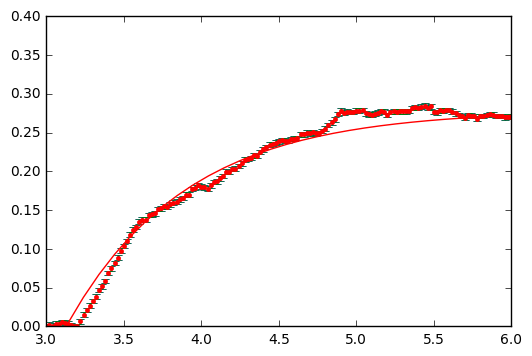

('K1 =', 16.156402205041044, '+/-', inf)
('k2 =', 15.877415214011057, '+/-', inf)
('tau_1 =', 0.77063431136236493, '+/-', inf)
('tau_2 =', 0.11722612477661246, '+/-', inf)


(0.0, 0.4)

In [20]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['i1_l'][150:350]-(yaw_left_df['i1_l'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(0.00, 0.4)

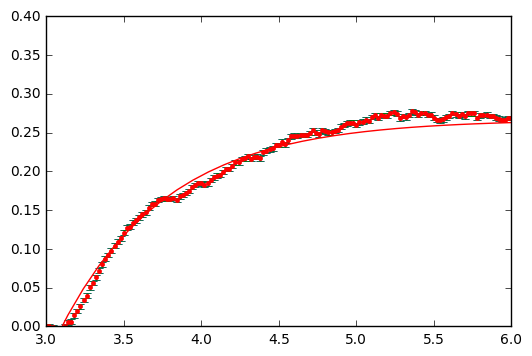

('K1 =', 24.084263766088341, '+/-', inf)
('k2 =', 23.817253849465285, '+/-', inf)
('tau_1 =', 0.68868648949133149, '+/-', inf)
('tau_2 =', 0.12339765490617498, '+/-', inf)


(0.0, 0.4)

In [22]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['i2_l'][150:350]-(yaw_left_df['i2_l'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(0.00, 0.4)

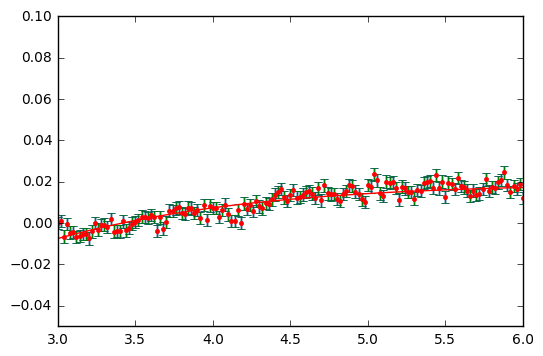

('K1 =', 16.884909936529276, '+/-', nan)
('k2 =', 16.865690467312593, '+/-', nan)
('tau_1 =', 0.91948758374133122, '+/-', nan)
('tau_2 =', 0.90807880576545319, '+/-', nan)


/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in double_scalars
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in double_scalars
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in double_scalars
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: invalid value encountered in double_scalars


(-0.05, 0.1)

In [335]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['b1_l'][150:350]-(yaw_left_df['b1_l'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=10000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(-0.05, 0.1)

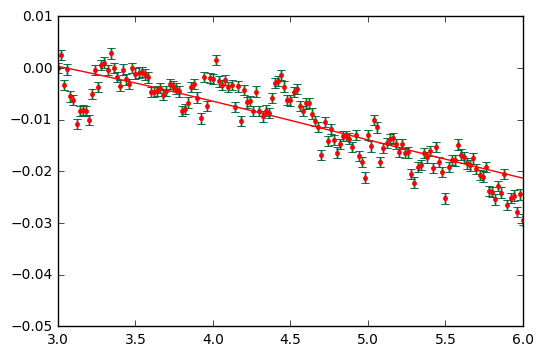

('K1 =', 4.000841847250606, '+/-', nan)
('k2 =', 4.0675972486510084, '+/-', nan)
('tau_1 =', 3.5197871478451921, '+/-', nan)
('tau_2 =', 3.6131774781846873, '+/-', nan)


/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in double_scalars
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in double_scalars
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in double_scalars
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: invalid value encountered in double_scalars


(-0.05, 0.01)

In [346]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['b1_r'][150:350] -(yaw_left_df['b1_r'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.001, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=10000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(-0.05, 0.010)

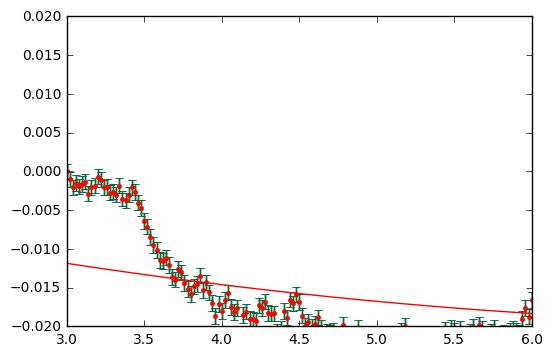

('K1 =', 683.63312852345018, '+/-', 285500.79983508086)
('k2 =', 208.35879501425296, '+/-', 151448.32173473749)
('tau_1 =', 1635.4576117802926, '+/-', 285500.79983508086)
('tau_2 =', 492.7379795055457, '+/-', 151448.32173473749)


(-0.02, 0.02)

In [363]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['b2_l'][150:350]-(yaw_left_df['b2_l'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.001, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=10000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(-0.02, 0.02)

('K1 =', 4.7422945033763462, '+/-', 28441.402009803784)
('k2 =', 4.761506574312957, '+/-', 28441.402021325095)
('tau_1 =', 0.26605662468142194, '+/-', 28441.402009803784)
('tau_2 =', 0.2675991283258945, '+/-', 28441.402021325095)
('Parameters', array([-6.54690563, -7.06954683,  8.16637392,  9.05811593]))
('RMSE:', 0.0017408456064120037)
('R-squared:', 0.92272948265522325)
()


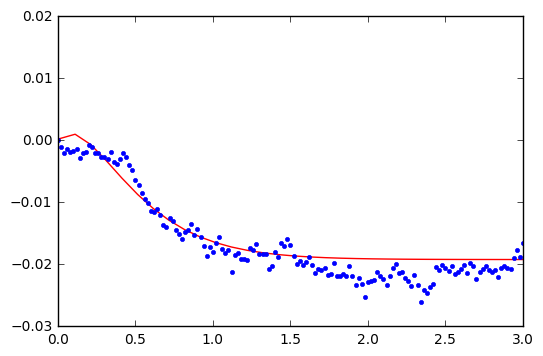

In [405]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02

colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x1 = times[150:350]
x=x1-x1[0]

y = yaw_left_df['b2_l'][150:350]-(yaw_left_df['b2_l'][150])


# power law function
#def func_power_law(x,a,b,c):
#    return a*(x**b)+c

def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    
def exponential_fit(t, parameters):
    K1 = parameters[0]
    K2 = parameters[1]
    tau1= parameters[2]
    tau2 = parameters[3]
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = exponential_f(x, *parameterTuple)
    return numpy.sum((y - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    #maxK = max(100)
    #minK = min(-10)
    #maxtau = max(100)
    #mintau = min(-10)
    #maxXY = max(maxK, maxtau)
    maxXY = 50

    parameterBounds = []
    parameterBounds.append([-10, 10]) # seach bounds for k1
    parameterBounds.append([-10, 10]) # seach bounds for k2
    parameterBounds.append([-10, 10]) # seach bounds for tau1
    parameterBounds.append([-10, 10]) # seach bounds for tau2

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=0)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(exponential_f, x, y, geneticParameters, maxfev = 10000)


#popt, pcov = curve_fit(exponential_f, x, y, geneticParameters, maxfev=10000, bounds=(-10, [100., 100., 100., 100.]))

popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.09,0.07,0.25,0.9]), maxfev=20000)

#K1 = 0.09
#K2 = 0.07
#tau1 = .25
#tau2 = .9

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)


print('Parameters', fittedParameters)

modelPredictions = exponential_f(x, *fittedParameters) 

absError = modelPredictions - y

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(y))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

print()

'''
##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(x, y,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(x), max(y))
    yModel = exponential_f(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)
'''

#plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.plot(x, y, '.')
plt.xlim(0, 3)
plt.ylim(-0.03, 0.02)
plt.show()

In [ ]:
## put together table 


('K1 =', 12.058620700947371, '+/-', 42602.234212750533)
('k2 =', 14.046573660322943, '+/-', 42472.687369726998)
('tau_1 =', 10.633175404306469, '+/-', 42602.234212750533)
('tau_2 =', 12.875587124228447, '+/-', 42472.687369726998)
('Parameters', array([-16.56637171, -14.58338607,  12.65904679,  10.78837872]))
('RMSE:', 0.0058809254352554284)
('R-squared:', 0.86492888450060335)
()


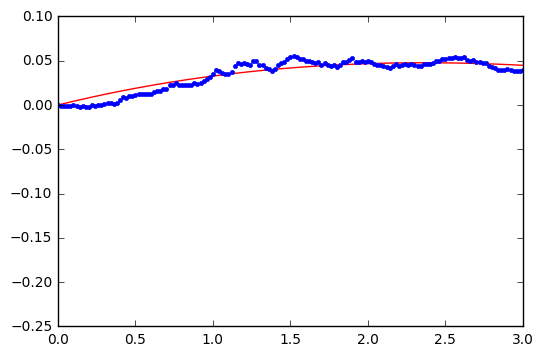

In [411]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02

colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x1 = times[150:350]
x=x1-x1[0]

y = yaw_left_df['b2_r'][150:350]-(yaw_left_df['b2_r'][150])


# power law function
#def func_power_law(x,a,b,c):
#    return a*(x**b)+c

def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    
def exponential_fit(t, parameters):
    K1 = parameters[0]
    K2 = parameters[1]
    tau1= parameters[2]
    tau2 = parameters[3]
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = exponential_f(x, *parameterTuple)
    return numpy.sum((y - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    #maxK = max(100)
    #minK = min(-10)
    #maxtau = max(100)
    #mintau = min(-10)
    #maxXY = max(maxK, maxtau)
    maxXY = 50

    parameterBounds = []
    parameterBounds.append([-10, 10]) # seach bounds for k1
    parameterBounds.append([-10, 10]) # seach bounds for k2
    parameterBounds.append([-10, 10]) # seach bounds for tau1
    parameterBounds.append([-10, 10]) # seach bounds for tau2

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=0)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(exponential_f, x, y, geneticParameters, maxfev = 10000)


#popt, pcov = curve_fit(exponential_f, x, y, geneticParameters, maxfev=10000, bounds=(-10, [100., 100., 100., 100.]))

popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.09,0.07,0.25,0.9]), maxfev=20000)

#K1 = 0.09
#K2 = 0.07
#tau1 = .25
#tau2 = .9

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)


print('Parameters', fittedParameters)

modelPredictions = exponential_f(x, *fittedParameters) 

absError = modelPredictions - y

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(y))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

print()

'''
##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(x, y,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(x), max(y))
    yModel = exponential_f(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)
'''

#plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.plot(x, y, '.')
plt.xlim(0, 3)
#plt.ylim(-0.05, 0.075)
plt.show()

('K1 =', -0.046574995320444942, '+/-', 50937.808315331138)
('k2 =', 0.15670939077524934, '+/-', 50937.808394676016)
('tau_1 =', 0.41406620619780771, '+/-', 50937.808315331138)
('tau_2 =', 0.41406272534080657, '+/-', 50937.808394676016)
('Parameters', array([ 0.2189997 ,  0.27955676,  6.77247862,  0.63240212]))
('RMSE:', 0.0126776134173756)
('R-squared:', 0.93673418066985792)
()


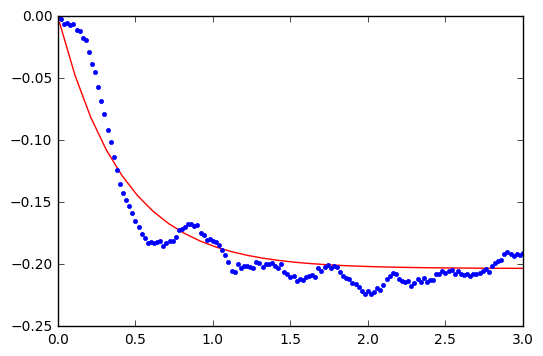

In [414]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02

colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x1 = times[150:350]
x=x1-x1[0]

y = yaw_left_df['iii3_l'][150:350]-(yaw_left_df['iii3_l'][150])


# power law function
#def func_power_law(x,a,b,c):
#    return a*(x**b)+c

def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    
def exponential_fit(t, parameters):
    K1 = parameters[0]
    K2 = parameters[1]
    tau1= parameters[2]
    tau2 = parameters[3]
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = exponential_f(x, *parameterTuple)
    return numpy.sum((y - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    #maxK = max(100)
    #minK = min(-10)
    #maxtau = max(100)
    #mintau = min(-10)
    #maxXY = max(maxK, maxtau)
    maxXY = 50

    parameterBounds = []
    parameterBounds.append([-10, 10]) # seach bounds for k1
    parameterBounds.append([-10, 10]) # seach bounds for k2
    parameterBounds.append([-10, 10]) # seach bounds for tau1
    parameterBounds.append([-10, 10]) # seach bounds for tau2

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=0)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(exponential_f, x, y, geneticParameters, maxfev = 10000)


#popt, pcov = curve_fit(exponential_f, x, y, geneticParameters, maxfev=10000, bounds=(-10, [100., 100., 100., 100.]))

popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.09,0.07,0.25,0.9]), maxfev=20000)

#K1 = 0.09
#K2 = 0.07
#tau1 = .25
#tau2 = .9

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)


print('Parameters', fittedParameters)

modelPredictions = exponential_f(x, *fittedParameters) 

absError = modelPredictions - y

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(y))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

print()

'''
##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(x, y,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(x), max(y))
    yModel = exponential_f(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)
'''

#plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.plot(x, y, '.')
plt.xlim(0, 3)
#plt.ylim(-0.03, 0.02)
plt.show()

In [ ]:
#### edit this method and incorportate into massive figure 

import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02

colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x1 = times[150:350]
x=x1-x1[0]

y = yaw_left_df['b2_l'][150:350]-(yaw_left_df['b2_l'][150])


# power law function
#def func_power_law(x,a,b,c):
#    return a*(x**b)+c

def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    
def exponential_fit(t, parameters):
    K1 = parameters[0]
    K2 = parameters[1]
    tau1= parameters[2]
    tau2 = parameters[3]
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = exponential_f(x, *parameterTuple)
    return numpy.sum((y - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    #maxK = max(100)
    #minK = min(-10)
    #maxtau = max(100)
    #mintau = min(-10)
    #maxXY = max(maxK, maxtau)
    maxXY = 50

    parameterBounds = []
    parameterBounds.append([-10, 10]) # seach bounds for k1
    parameterBounds.append([-10, 10]) # seach bounds for k2
    parameterBounds.append([-10, 10]) # seach bounds for tau1
    parameterBounds.append([-10, 10]) # seach bounds for tau2

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=0)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(exponential_f, x, y, geneticParameters, maxfev = 10000)


#popt, pcov = curve_fit(exponential_f, x, y, geneticParameters, maxfev=10000, bounds=(-10, [100., 100., 100., 100.]))

popt, pcov = curve_fit(exponential_f, x, y, p0=np.asarray([0.09,0.07,0.25,0.9]), maxfev=20000)

#K1 = 0.09
#K2 = 0.07
#tau1 = .25
#tau2 = .9

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)


print('Parameters', fittedParameters)

modelPredictions = exponential_f(x, *fittedParameters) 

absError = modelPredictions - y

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(y))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

print()

'''
##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(x, y,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(x), max(y))
    yModel = exponential_f(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)
'''

#plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.plot(x, y, '.')
plt.xlim(0, 3)
plt.ylim(-0.03, 0.02)
plt.show()

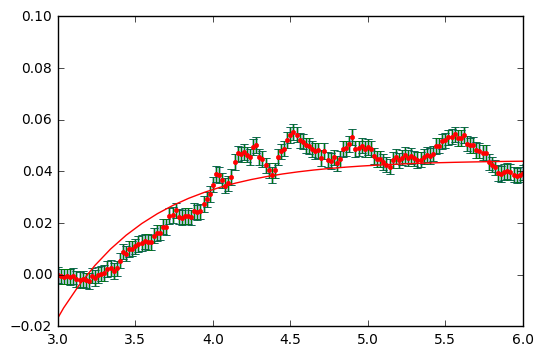

('K1 =', 9.3854359116054056, '+/-', inf)
('k2 =', 9.3410755228385032, '+/-', inf)
('tau_1 =', 0.59552991720053938, '+/-', inf)
('tau_2 =', 0.12144312392402309, '+/-', inf)


(-0.02, 0.1)

In [341]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['b2_r'][150:350]-(yaw_left_df['b2_r'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=100000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(-0.02, 0.1)

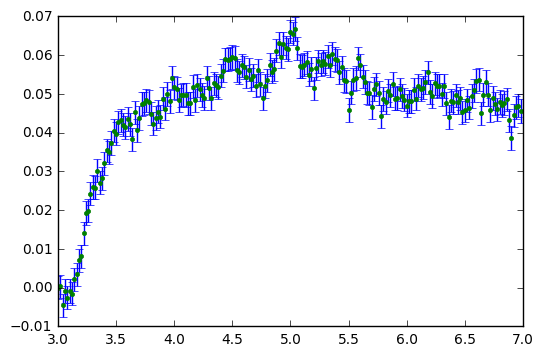

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.

In [102]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['b3_l'][150:350]-(yaw_left_df['b3_l'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=10000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
#plt.ylim(-0.02, 0.02)

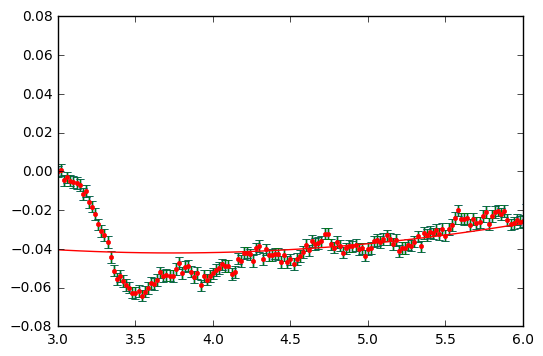

('K1 =', 1516.6121527507519, '+/-', 78362.149921030548)
('k2 =', 458.21331411278476, '+/-', 86708.557914544377)
('tau_1 =', 769.76115906712778, '+/-', 78362.149921030548)
('tau_2 =', 229.93127455801627, '+/-', 86708.557914544377)


(3, 6)

In [106]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['b3_r'][150:350]-(yaw_left_df['b3_r'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=100000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
#plt.ylim(-0.02, 0.02)

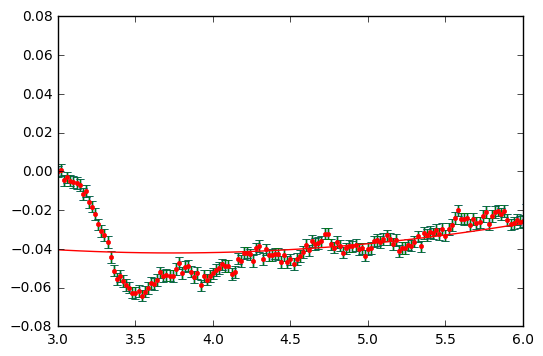

('K1 =', 452.03706177994115, '+/-', 92835.34960732609)
('k2 =', 1502.16979695237, '+/-', 79178.541398568559)
('tau_1 =', 228.56524207362429, '+/-', 92835.34960732609)
('tau_2 =', 768.32414922449891, '+/-', 79178.541398568559)


(3, 6)

In [107]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['b3_r'][150:350]-(yaw_left_df['b3_r'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return -(K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2)))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=100000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
#plt.ylim(-0.02, 0.02)

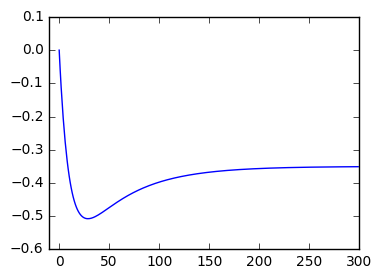

In [178]:
#y = K1*(1-e^(t/tau1)) - K2*(1-e(t/tau2))

plt.figure(1, figsize=(4, 3))
t = np.arange(0,300)
K1 = 0.7
K2 = 0.35
tau1 = 10.
tau2 = 50.
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
y = -(K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2)))
plt.plot(t, y)

plt.xlim(-10., 300.)
#plt.ylim(0., 1.0)

plt.show()

In [156]:
bounds=(0, [3., 1., 0.5])

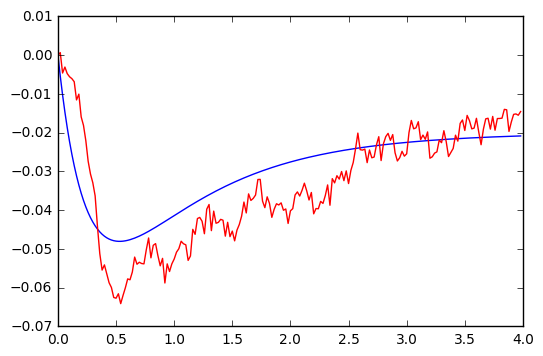

In [249]:

times = np.arange(350)*0.02
t = times[150:350]
x = t - times[150]

K1 = 0.09
K2 = 0.07
tau1 = .25
tau2 = .9
y= -(K1*(1-math.e**(-x/tau1)) - K2*(1-math.e**(-(x)/tau2)))
y_data =yaw_left_df['b3_r'][150:350]-(yaw_left_df['b3_r'][150])

plt.plot(x, y)
plt.plot(x, y_data, 'r')
plt.xlim(0, 4)
#plt.ylim(0, 0.1)

plt.show()

y= -(K1*(1-math.e**(-x/tau1)) - K2*(1-math.e**(-(x)/tau2)))

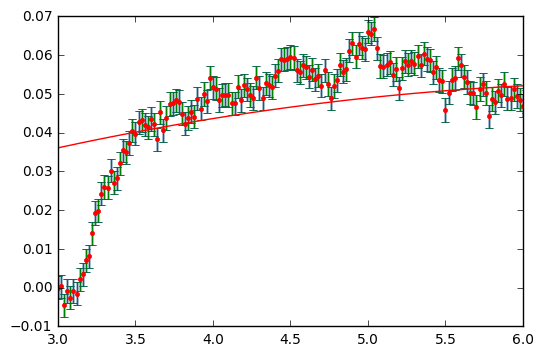

('K1 =', 638.63259789891117, '+/-', 261842.30061019733)
('k2 =', 2103.1777270819666, '+/-', 472289.36496532662)
('tau_1 =', 446.78275962333657, '+/-', 261842.30061019733)
('tau_2 =', 1487.3838771368175, '+/-', 472289.36496532662)


(3, 6)

In [253]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['b3_l'][150:350]-(yaw_left_df['b3_l'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=100000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
#plt.ylim(-0.02, 0.02)

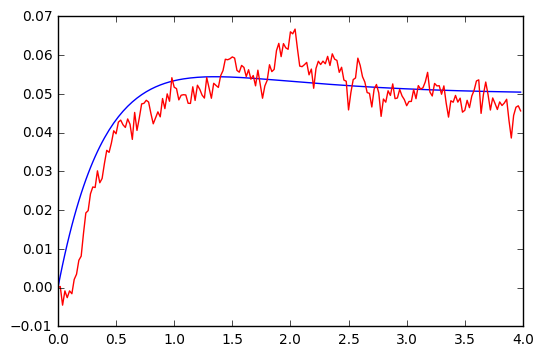

In [263]:

times = np.arange(350)*0.02
t = times[150:350]
x = t - times[150]

K1 = 0.09
K2 = 0.04
tau1 = .45
tau2 = .9
y= (K1*(1-math.e**(-x/tau1)) - K2*(1-math.e**(-(x)/tau2)))
y_data =yaw_left_df['b3_l'][150:350]-(yaw_left_df['b3_l'][150])

plt.plot(x, y)
plt.plot(x, y_data, 'r')
plt.xlim(0, 4)
#plt.ylim(0, 0.1)

plt.show()

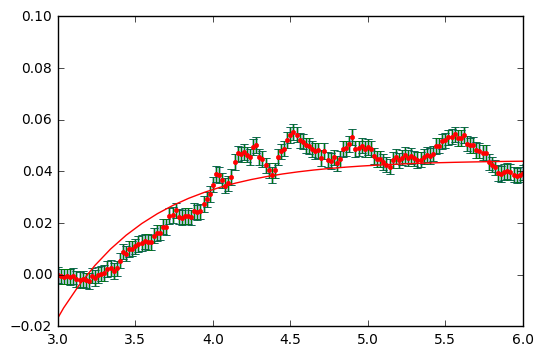

('K1 =', 9.3854359116054056, '+/-', inf)
('k2 =', 9.3410755228385032, '+/-', inf)
('tau_1 =', 0.59552991720053938, '+/-', inf)
('tau_2 =', 0.12144312392402309, '+/-', inf)


(-0.02, 0.1)

In [276]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['b2_r'][150:350]-(yaw_left_df['b2_r'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=100000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(-0.02, 0.1)

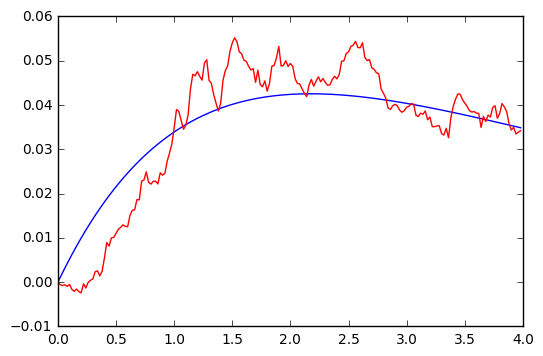

In [309]:

times = np.arange(350)*0.02
t = times[150:350]
x = t - times[150]

K1 = 0.16
K2 = 0.155
tau1 = 1.5
tau2 = 3
y= (K1*(1-math.e**(-x/tau1)) - K2*(1-math.e**(-(x)/tau2)))
y_data =yaw_left_df['b2_r'][150:350]-(yaw_left_df['b2_r'][150])

plt.plot(x, y)
plt.plot(x, y_data, 'r')
plt.xlim(0, 4)
#plt.ylim(0, 0.1)

plt.show()

y= (K1*(1-math.e**(-x/tau1)) - K2*(1-math.e**(-(x)/tau2)))

In [ ]:
Simple exponential, filter sliding along waveform 


In [269]:
import numpy as np
from scipy.optimize import curve_fit

In [271]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

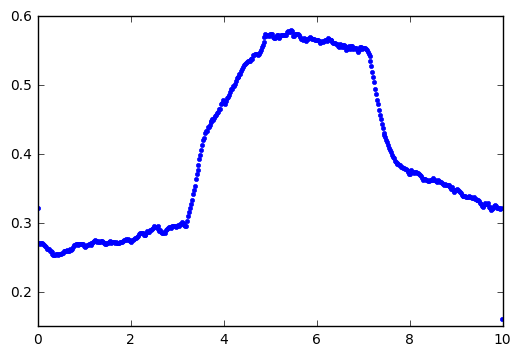

In [277]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

plt.plot(times, yaw_left_df['i1_l'], '.')
plt.show()

x = times
y = yaw_left_df['i1_l']

In [278]:
def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

In [279]:
popt, pcov = curve_fit(exponential_f, x, y)

In [280]:
popt

array([ 0.66019056,  0.00374344,  2.87910997,  2.12030152])

<Container object of 3 artists>

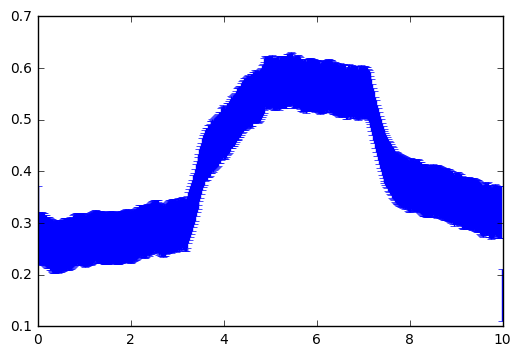

In [289]:
e = np.repeat(0.05, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")

In [291]:
popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

In [292]:
popt

array([ 0.66018769,  0.00374323,  2.87909607,  2.12027801])

In [297]:
print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

('K1 =', 0.6601876892738382, '+/-', 0.058626413549035437)
('k2 =', 0.0037432254375404728, '+/-', 0.0040285727430118051)
('tau_1 =', 2.8790960667116523, '+/-', 0.058626413549035437)
('tau_2 =', 2.1202780094989921, '+/-', 0.0040285727430118051)


(-1.0, 10)

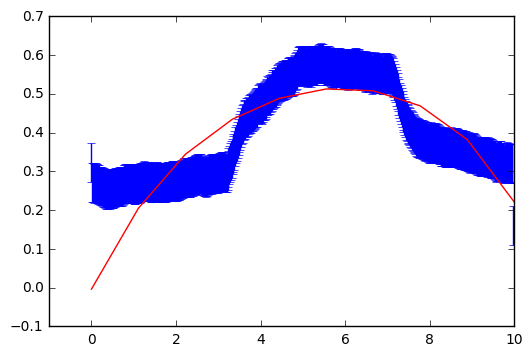

In [306]:
plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(-1., 10)
plt.xlim(-1., 10)

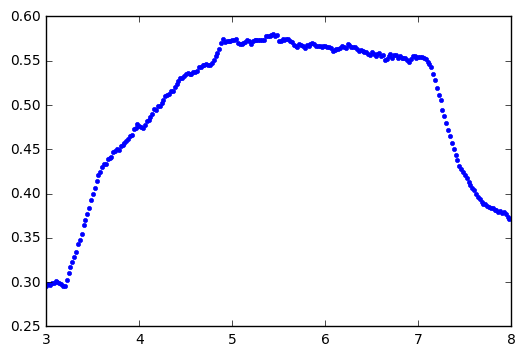

In [392]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]
y = yaw_left_df['i1_l'][150:400]

plt.plot(x, y, '.')
plt.show()

In [394]:
def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))

In [395]:
popt, pcov = curve_fit(exponential_f, x, y)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

<Container object of 3 artists>

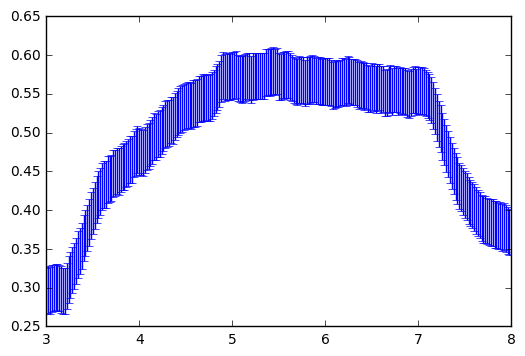

In [319]:
e = np.repeat(0.03, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")

In [320]:
popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

In [321]:
print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

('K1 =', 9585.8856001840522, '+/-', 583857.78420422261)
('k2 =', 0.0033349100223061612, '+/-', 0.00082995615915445325)
('tau_1 =', 75079.851261628457, '+/-', 583857.78420422261)
('tau_2 =', 1.4936732188711859, '+/-', 0.00082995615915445325)


(0.1, 0.7)

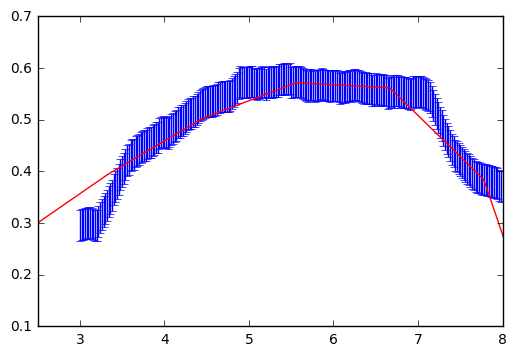

In [326]:
plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(2.5, 8)
plt.ylim(0.1, 0.7)

Yaw left B2 Left

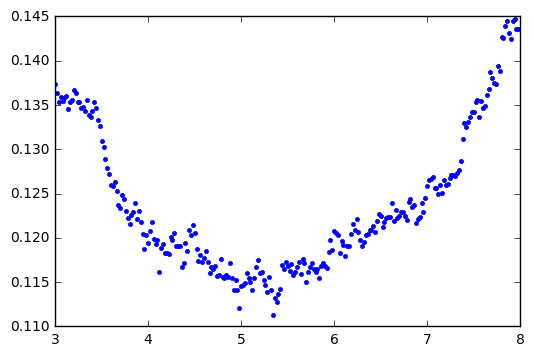

In [328]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]
y = yaw_left_df['b2_l'][150:400]

plt.plot(x, y, '.')
plt.show()

In [329]:
def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

<Container object of 3 artists>

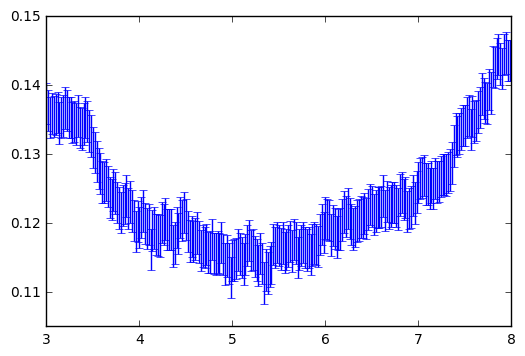

In [332]:
e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")

In [333]:
popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

/home/imager/.local/lib/python2.7/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [334]:
print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

('K1 =', 0.12098660353132569, '+/-', inf)
('k2 =', -1.6805189548953564e-09, '+/-', inf)
('tau_1 =', 0.10938957269600436, '+/-', inf)
('tau_2 =', 0.47970244253232086, '+/-', inf)


(0.05, 0.2)

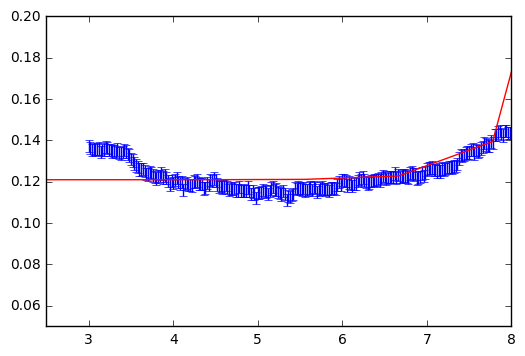

In [339]:
plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(2.5, 8)
plt.ylim(0.05, 0.2)

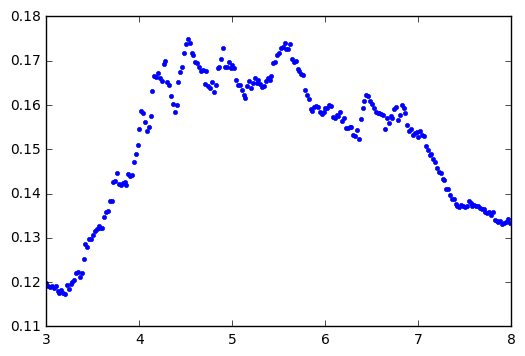

('K1 =', 0.93964197849309694, '+/-', 0.078648487044560025)
('k2 =', 0.61414487867098977, '+/-', 0.089001195964114946)
('tau_1 =', 1.6612561602054221, '+/-', 0.078648487044560025)
('tau_2 =', 29.924721756085969, '+/-', 0.089001195964114946)


(0.05, 0.2)

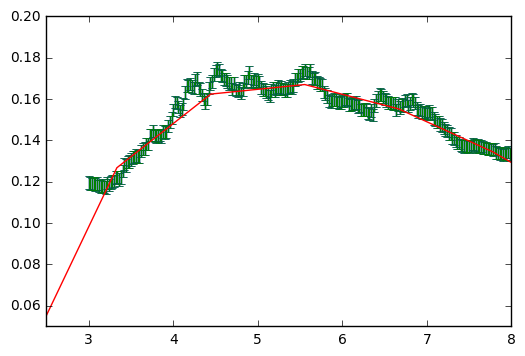

In [340]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]
y = yaw_left_df['b2_r'][150:400]

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(2.5, 8)
plt.ylim(0.05, 0.2)

In [ ]:
# shift and subtract these for starting point 

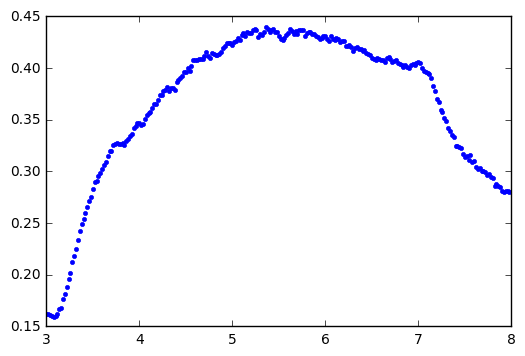

('K1 =', 7253.8812146991186, '+/-', 633472.76914814487)
('k2 =', 0.0011206193324891426, '+/-', 0.00043424270309461426)
('tau_1 =', 80806.726340683657, '+/-', 633472.76914814487)
('tau_2 =', 1.3156453925269034, '+/-', 0.00043424270309461426)


(0.1, 0.5)

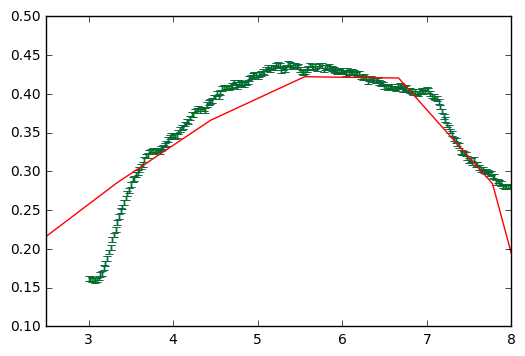

In [343]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]
y = yaw_left_df['i2_l'][150:400]

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(2.5, 8)
plt.ylim(0.1, 0.5)

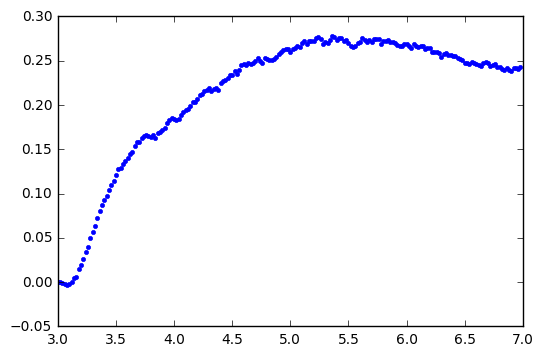

('K1 =', 24.084263766088341, '+/-', inf)
('k2 =', 23.817253849465285, '+/-', inf)
('tau_1 =', 0.68868648949133149, '+/-', inf)
('tau_2 =', 0.12339765490617498, '+/-', inf)


(0.0, 0.4)

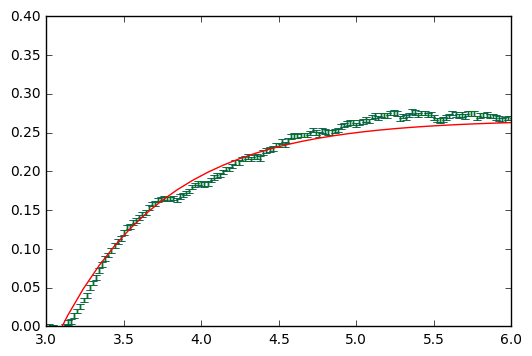

In [403]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]
y = yaw_left_df['i2_l'][150:350]-(yaw_left_df['i2_l'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(0.00, 0.4)

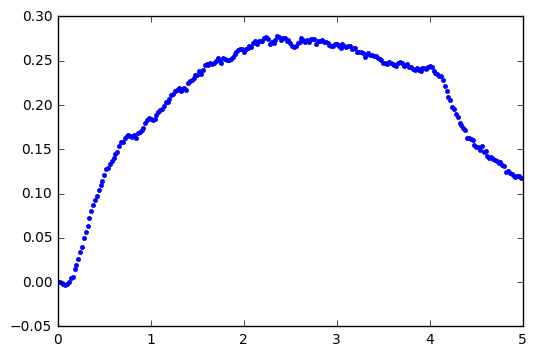

('K1 =', 0.3968040991693696, '+/-', 0.0077379239779209932)
('k2 =', 0.014306438882995324, '+/-', 0.0019903686446530581)
('tau_1 =', 1.298382008554295, '+/-', 0.0077379239779209932)
('tau_2 =', 1.663086278600175, '+/-', 0.0019903686446530581)


(0.0, 0.4)

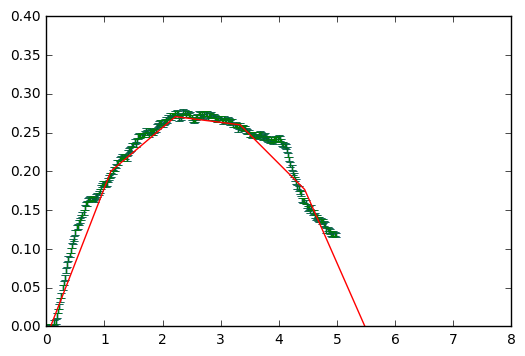

In [358]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]-times[150]
y = yaw_left_df['i2_l'][150:400]-(yaw_left_df['i2_l'][150])
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
    #y = K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(0, 8)
plt.ylim(0.00, 0.4)

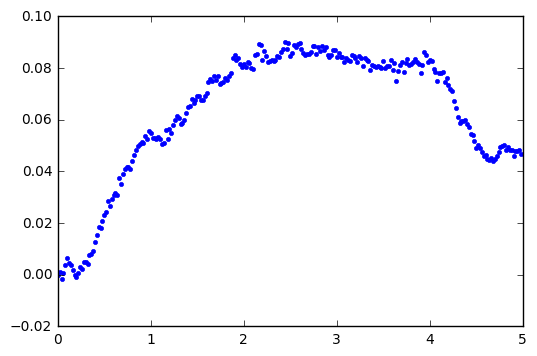

('K1 =', 0.16705666958047963, '+/-', 0.0041925201040326453)
('k2 =', 0.010251602640809931, '+/-', 0.0011190142582539226)
('tau_1 =', 1.9417326621711359, '+/-', 0.0041925201040326453)
('tau_2 =', 2.0523877870353995, '+/-', 0.0011190142582539226)


(0.0, 0.4)

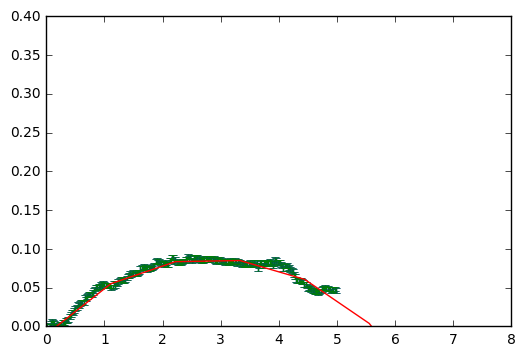

In [360]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]-times[150]
y = yaw_left_df['iii1_l'][150:400]-(yaw_left_df['iii1_l'][150])
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
    #y = K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(0, 8)
plt.ylim(0.00, 0.4)

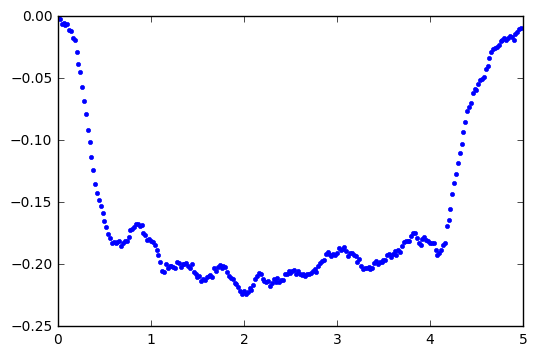

('K1 =', -0.2213107021722879, '+/-', 0.003071006289881213)
('k2 =', -0.00023409064490006594, '+/-', 8.4689969760243057e-05)
('tau_1 =', 0.50764845737251485, '+/-', 0.003071006289881213)
('tau_2 =', 0.71215627320912767, '+/-', 8.4689969760243057e-05)


(0, 8)

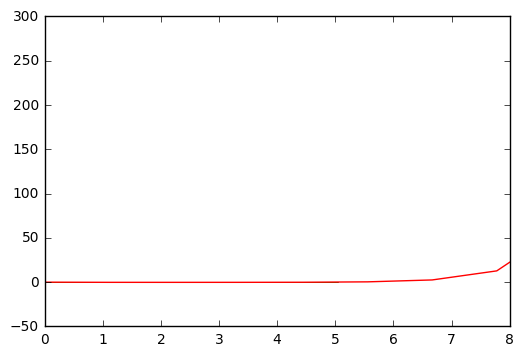

In [362]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]-times[150]
y = yaw_left_df['iii3_l'][150:400]-(yaw_left_df['iii3_l'][150])
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
    #y = K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(0, 8)
#plt.ylim(0.00, 0.4)

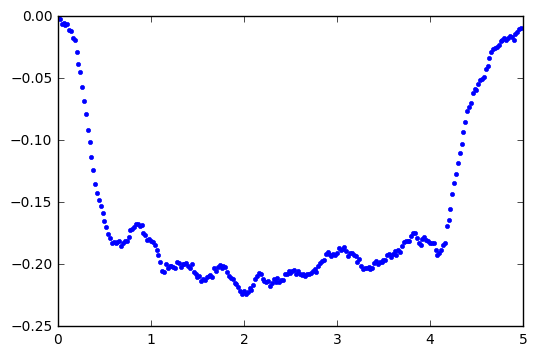

('K1 =', 0.22131029534549734, '+/-', 0.003071251099807232)
('k2 =', 0.00023407757126658787, '+/-', 8.4718673265754844e-05)
('tau_1 =', 0.50764585382392957, '+/-', 0.003071251099807232)
('tau_2 =', 0.71215049544720854, '+/-', 8.4718673265754844e-05)


(-0.2, 0.1)

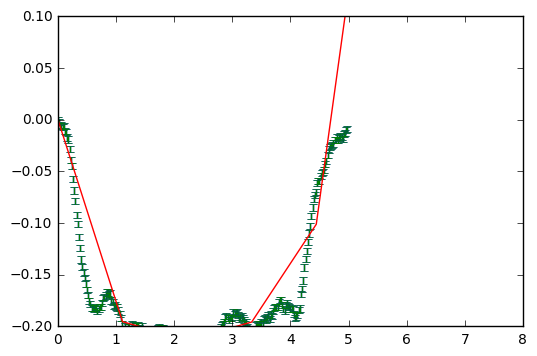

In [365]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]-times[150]
y = yaw_left_df['iii3_l'][150:400]-(yaw_left_df['iii3_l'][150])
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return -(K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2)))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
    #y = K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(0, 8)
plt.ylim(-.20, 0.1)

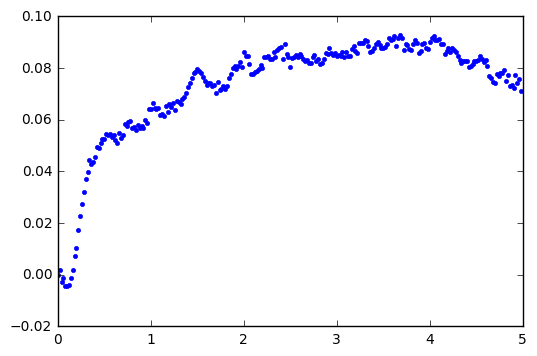

('K1 =', 0.08795467223782967, '+/-', 0.000654829143557177)
('k2 =', 6.9285454842991229e-09, '+/-', 2.1837430949504059e-08)
('tau_1 =', 0.76418633797306168, '+/-', 0.000654829143557177)
('tau_2 =', 0.33744907289320392, '+/-', 2.1837430949504059e-08)


(0.0, 0.15)

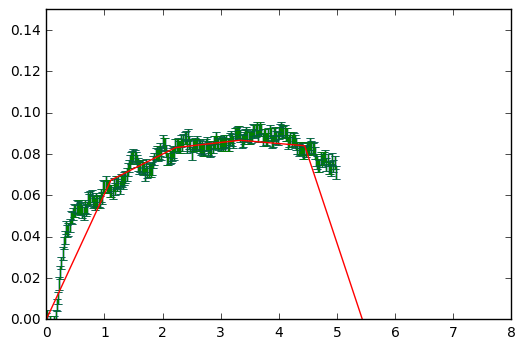

In [368]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]-times[150]
y = yaw_left_df['iii3_r'][150:400]-(yaw_left_df['iii3_r'][150])
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
    #y = K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(0, 8)
plt.ylim(0.00, 0.15)

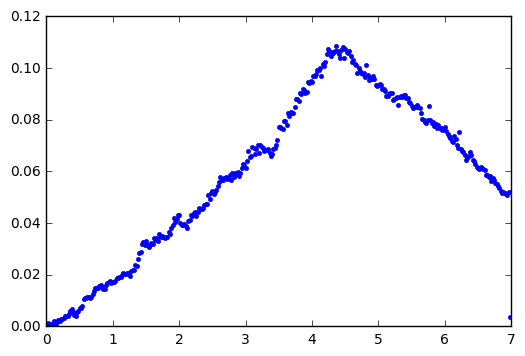

('K1 =', 1395.1886630793538, '+/-', 138993.55449434291)
('k2 =', 0.00080432842189686183, '+/-', 0.00026758914438334934)
('tau_1 =', 55852.44930086135, '+/-', 138993.55449434291)
('tau_2 =', 1.3531617209701514, '+/-', 0.00026758914438334934)


(0.0, 0.15)

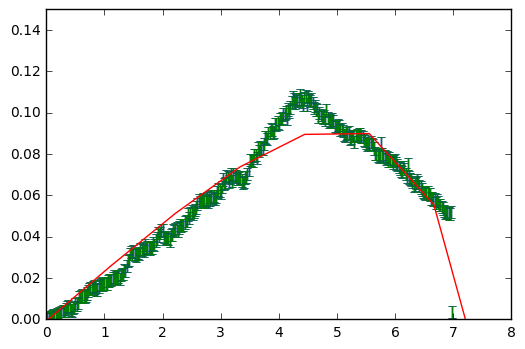

In [372]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:550]-times[150]
y = yaw_left_df['hg3_l'][150:550]-(yaw_left_df['hg3_l'][150])
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
    #y = K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(0, 8)
plt.ylim(0.00, 0.15)

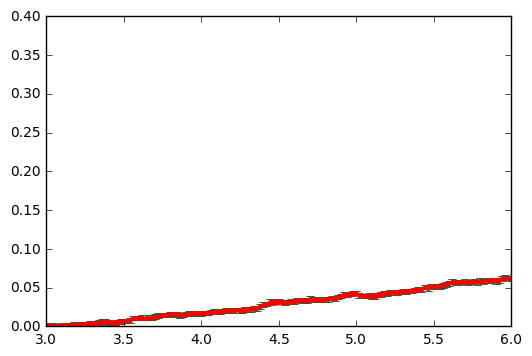

('K1 =', 306.18045198855253, '+/-', 54575.780626246713)
('k2 =', 0.13633921039628741, '+/-', 0.03255258835546624)
('tau_1 =', 9844.9138633134353, '+/-', 54575.780626246713)
('tau_2 =', 2.6194403573930969, '+/-', 0.03255258835546624)


(0.0, 0.4)

In [312]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(350)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:350]
y = yaw_left_df['hg3_l'][150:350]-(yaw_left_df['hg3_l'][150])

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(1-math.e**(-(t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e, maxfev=100000)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0.01, 10., 100)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(3, 6)
plt.ylim(0.00, 0.4)

/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in divide
/home/imager/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


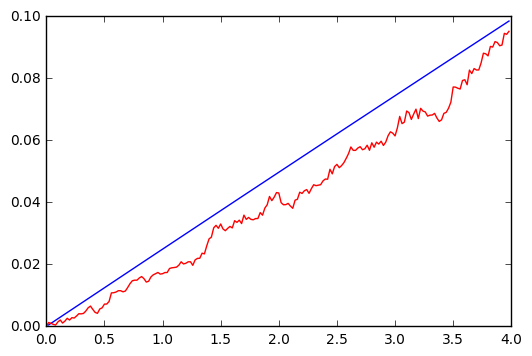

In [459]:

times = np.arange(350)*0.02
t = times[150:350]
x = t - times[150]
y= K1*(1-math.e**(-x/tau1)) - K2*(1-math.e**(-(x)/tau2))
y_data =yaw_left_df['hg3_l'][150:350]-(yaw_left_df['hg3_l'][150])
K1 = 5
K2 = 0
tau1 = 100
tau2 = 0

plt.plot(x, y)
plt.plot(x, y_data, 'r')
plt.xlim(0, 4)
plt.ylim(0, 0.1)

plt.show()

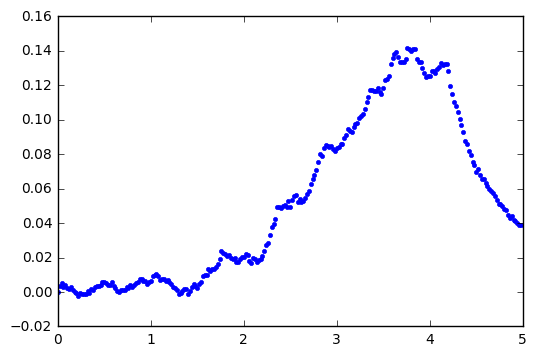

('K1 =', 3166.2600522100161, '+/-', 558118.56836240634)
('k2 =', 0.035363805064074175, '+/-', 0.0045973805096515422)
('tau_1 =', 49156.558112209605, '+/-', 558118.56836240634)
('tau_2 =', 2.5897751642411264, '+/-', 0.0045973805096515422)


(0.0, 0.15)

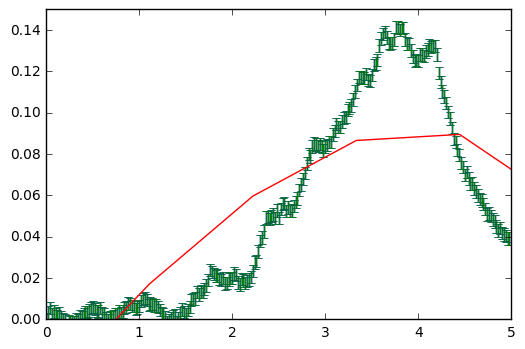

In [455]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]-times[150]
y = pitch_up_df['b2_l'][150:400]-(pitch_up_df['b2_l'][150])
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
    #y = K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(0, 5)
plt.ylim(0.00, 0.15)

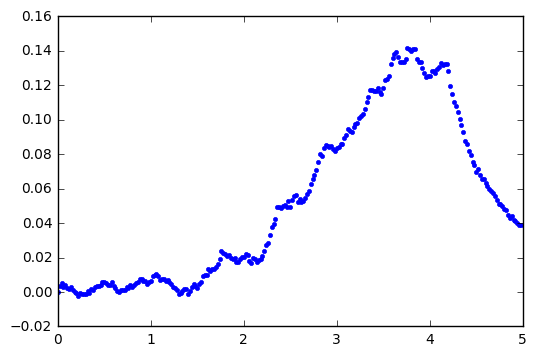

('K1 =', 3166.2600522100161, '+/-', 558118.56836240634)
('k2 =', 0.035363805064074175, '+/-', 0.0045973805096515422)
('tau_1 =', 49156.558112209605, '+/-', 558118.56836240634)
('tau_2 =', 2.5897751642411264, '+/-', 0.0045973805096515422)


(0.0, 0.15)

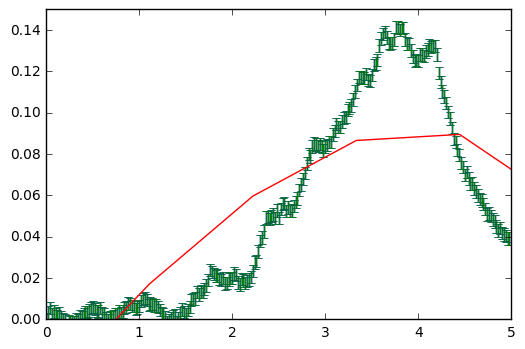

In [377]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]-times[150]
y = pitch_up_df['b2_l'][150:400]-(pitch_up_df['b2_l'][150])
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
    #y = K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(0, 5)
plt.ylim(0.00, 0.15)

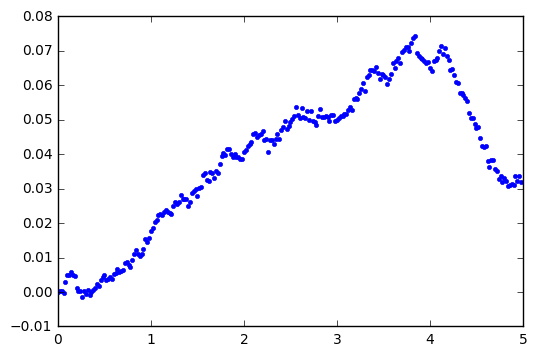

('K1 =', 1949.4679818673596, '+/-', 122366.7363489741)
('k2 =', 0.0079407838819628741, '+/-', 0.0010614560669526981)
('tau_1 =', 57729.272458073276, '+/-', 122366.7363489741)
('tau_2 =', 1.762959812076188, '+/-', 0.0010614560669526981)


(0.0, 0.15)

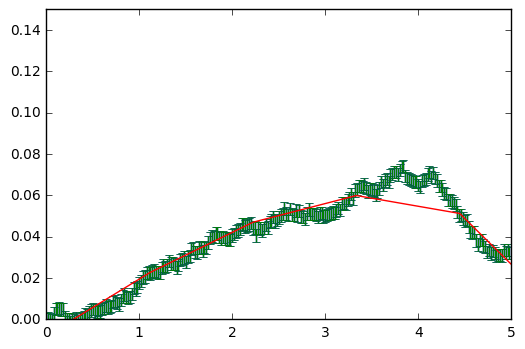

In [378]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')


times = np.arange(500)*0.02
colors = times[150:350]

#plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')

x = times[150:400]-times[150]
y = pitch_up_df['hg2_l'][150:400]-(pitch_up_df['hg2_l'][150])
#y = K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))

plt.plot(x, y, '.')
plt.show()


def exponential_f(t, K1, K2, tau1, tau2):
    return K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    #K1*(1-math.e**(t/tau1)) - K2*(1-math.e**(t/tau2))
    #y = K1*(1-math.e**(-t/tau1)) - K2*(math.e**((t)/tau2))
    

e = np.repeat(0.003, len(y))
plt.errorbar(x, y, yerr=e, fmt="none")


popt, pcov = curve_fit(exponential_f, x, y, sigma=e)

print("K1 =", popt[0], "+/-", pcov[0,0]**0.5)
print("k2 =", popt[1], "+/-", pcov[1,1]**0.5)
print("tau_1 =", popt[2], "+/-", pcov[0,0]**0.5)
print("tau_2 =", popt[3], "+/-", pcov[1,1]**0.5)

plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 10., 10)  # define values to plot the function for
plt.plot(xfine, exponential_f(xfine, popt[0], popt[1], popt[2], popt[3]), 'r-')
plt.xlim(0, 5)
plt.ylim(0.00, 0.15)

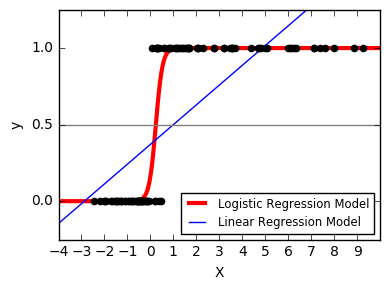

In [4]:
# General a toy dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()

In [11]:
# General a toy dataset:s it's just a straight line with some Gaussian noise:


import math

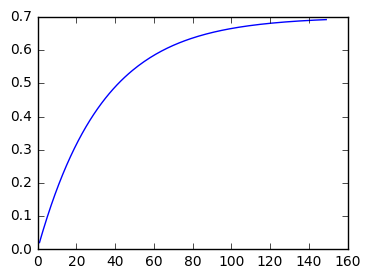

In [41]:
plt.figure(1, figsize=(4, 3))
x = np.arange(1,150)
M = 0.7
a =.03
y = M*(1-(math.e**(-a*x)))
#y = M(1− (np.exp(−ax)))
plt.plot(x, y)

plt.show()

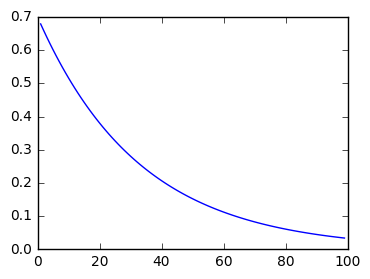

In [36]:
plt.figure(1, figsize=(4, 3))
x = np.arange(1,100)
b = 0.03
a =.7
y=a*(1-b)**x
#y = M(1− (np.exp(−ax)))
plt.plot(x, y)

plt.show()

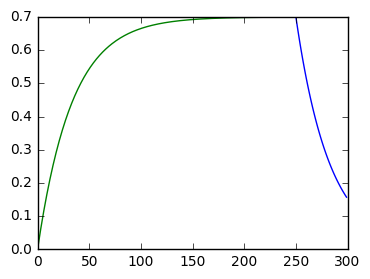

In [57]:
plt.figure(1, figsize=(4, 3))
x1 = np.arange(250,300)
b = 0.03
a =.7
y1=a*(1-b)**(x1-250)
#y = M(1− (np.exp(−ax)))
plt.plot(x1, y1)

x = np.arange(0,250)
M = 0.7
a2 =.03
y = M*(1-(math.e**(-a2*x)))
#y = M(1− (np.exp(−ax)))
plt.plot(x, y)

plt.xlim(0, 300)

plt.show()

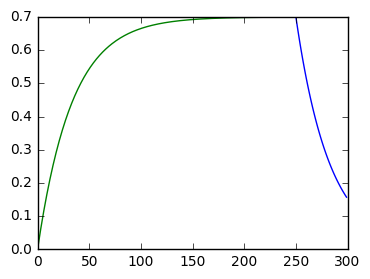

In [58]:
plt.figure(1, figsize=(4, 3))
x1 = np.arange(250,300)
b = 0.03
M =.7
y1=M*(1-b)**(x1-250)
#y = M(1− (np.exp(−ax)))
plt.plot(x1, y1)

x = np.arange(0,250)
M = 0.7
a2 =.03
y = M*(1-(math.e**(-a2*x)))
#y = M(1− (np.exp(−ax)))
plt.plot(x, y)

plt.xlim(0, 300)

plt.show()

In [60]:
import pandas as pd

/home/imager/.local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [70]:
yaw_left_df = pd.read_csv('yaw_left_df_nrm.csv')
yaw_right_df = pd.read_csv('yaw_right_df_nrm.csv')
pitch_up_df = pd.read_csv('pitch_up_df_nrm.csv')
pitch_down_df = pd.read_csv('pitch_down_df_nrm.csv')
roll_cw_df = pd.read_csv('roll_cw_df_nrm.csv')
roll_ccw_df = pd.read_csv('roll_ccw_df_nrm.csv')

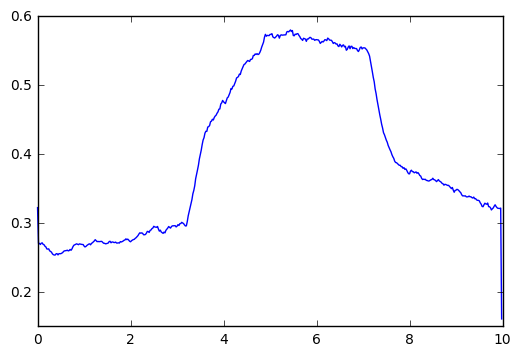

In [93]:

times = np.arange(500)*0.02
colors = times[150:350]

'''
x1= times[350:450]
b = 0.03
M =.55
y1=M*(1-b)**(x1-3)
#y = M(1− (np.exp(−ax)))
plt.plot(x1, y1)

x= times[150:350]
M = 0.55
a2 =.9
y = M*(1-(math.e**(-a2*x)))
#y = M(1− (np.exp(−ax)))
plt.plot(x, y)
'''
#plt.xlim(0, 300)

plt.plot(times,yaw_left_df['i1_l'],clip_on = False,color = 'b')


plt.show()

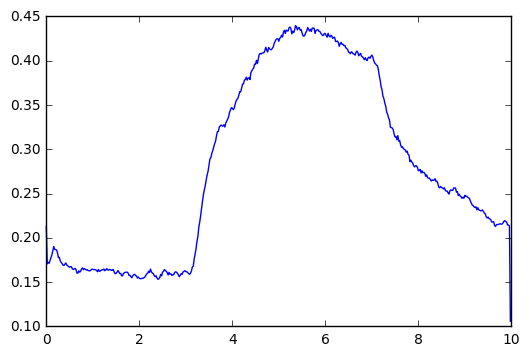

In [95]:

times = np.arange(500)*0.02
colors = times[150:350]

'''
x1= times[350:450]
b = 0.03
M =.55
y1=M*(1-b)**(x1-3)
#y = M(1− (np.exp(−ax)))
plt.plot(x1, y1)

x= times[150:350]
M = 0.55
a2 =.9
y = M*(1-(math.e**(-a2*x)))
#y = M(1− (np.exp(−ax)))
plt.plot(x, y)
'''
#plt.xlim(0, 300)

plt.plot(times,yaw_left_df['i2_l'],clip_on = False,color = 'b')


plt.show()

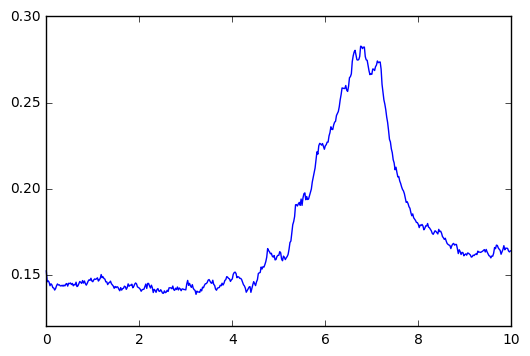

In [97]:

times = np.arange(500)*0.02
colors = times[150:350]

'''
x1= times[350:450]
b = 0.03
M =.55
y1=M*(1-b)**(x1-3)
#y = M(1− (np.exp(−ax)))
plt.plot(x1, y1)

x= times[150:350]
M = 0.55
a2 =.9
y = M*(1-(math.e**(-a2*x)))
#y = M(1− (np.exp(−ax)))
plt.plot(x, y)
'''
#plt.xlim(0, 300)

plt.plot(times,pitch_up_df['b2_l'],clip_on = False,color = 'b')


plt.show()

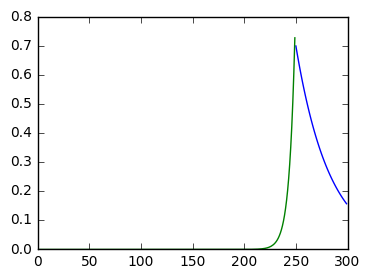

In [145]:
plt.figure(1, figsize=(4, 3))
x1 = np.arange(250,300)
b = 0.03
M =.7
y1=M*(1-b)**(x1-250)
#y = M(1− (np.exp(−ax)))
plt.plot(x1, y1)

x = np.arange(1,250)
M = .000000000000000000014
a2=1.2
y = M*(a2)**(x)
#y = M(1− (np.exp(−ax)))
plt.plot(x, y)

plt.xlim(0, 300)

plt.show()

In [2]:
x = time
den = x.max() - x.min()
x -= x.min()
y_points = rate
def func(x, a1, a2, a3):
    return  a1*sin(1*pi*x/den)+\
            a2*sin(2*pi*x/den)+\
            a3*sin(3*pi*x/den)
popt, pcov = curve_fit(func, x, y_points)
y = func(x, *popt)
plot(time,rate)
plot(x,y, color='r', linewidth=2.)
show()

NameError: name 'time' is not defined

In [1]:
data=pyfits.open('http://heasarc.gsfc.nasa.gov/docs/swift/results/transients/weak/GX304-1.orbit.lc.fits')
time  = data[1].data.field(0)/86400. + data[1].header['MJDREFF'] + data[1].header['MJDREFI']
rate  = data[1].data.field(1)
error = data[1].data.field(2)
data.close()

cond = ((time > 56200) & (time < 56220))
time=time[cond]
rate=rate[cond]
error=error[cond]

def expGauss(x, pos, wid, tConst, expMod = 0.5, amp = 1):
    expMod *= 1.0
    gNorm = amp * N.exp(-0.5*((x-pos)/(wid))**2)
    g = expBroaden(gNorm, tConst, expMod)
    return g, gNorm

def expBroaden(y, t, expMod):
    fy = F.fft(y)
    a = N.exp(-1*expMod*time/t)
    fa = F.fft(a)
    fy1 = fy*fa
    yb = (F.ifft(fy1).real)/N.sum(a)
    return yb

if __name__ == '__main__':

# Fit the first set
#p[0] -- amplitude, p[1] -- position, p[2] -- width
    fitfuncG = lambda p, x: p[0]*N.exp(-0.5*(x-p[1])**2/p[2]**2) # Target function
    errfuncG = lambda p, x, y: fitfuncG(p, x) - y # Distance to the target function
    p0 = [0.20, 56210, 2.0] # Initial guess for the parameters
    p1, success = optimize.leastsq(errfuncG, p0[:], args=(time, rate))
    p1G = fitfuncG(p1, time)
   # P.plot(rate,  'ro', alpha = 0.4, label = "Gaussian")
   # P.plot(p1G, label = 'G-Fit')

def expGauss(x, pos, wid, tConst, expMod = 0.5, amp = 1):
  #p[0] -- amplitude, p[1] -- position, p[2] -- width, p[3]--tConst, p[4] -- expMod  
    fitfuncExpG = lambda p, x: expGauss(x, p[1], p[2], p[3], p[4], p[0])[0]
    errfuncExpG = lambda p, x, y: fitfuncExpG(p, x) - y # Distance to the target function  
    p0a = [0.20, 56210, 2.0] # Initial guess for the parameters
    p1a, success = optimize.leastsq(errfuncExpG, p0a[:], args=(time, rate))
    p1aG = fitfuncExpG(p1a, time)
    print type(rate), type(time), len(rate), len(time)  
    P.plot(rate, 'go', alpha = 0.4, label = "ExpGaussian")  
    P.plot(p1aG, label = 'ExpG-Fit')

    P.legend()  
    P.show()

ImportError: No module named pyfits